In [1]:
import torchvision
import os
import torch

from utils.data_utils import *
from data.dataloader import *
from models.cnn_model import *
from utils.helper_function import *
from engine.engine import *

In [2]:
# input_dir = "/Users/winirrr/Documents/EventBased_Project/EB_data"
# output_dir_1 = "dataset_9/data_frame"
# process_directory_v2(input_dir=input_dir,
#                   output_dir=output_dir_1,
#                   representation=data_frame_tSlice)

# output_dir_2 = "dataset_9/time_surface"
# process_directory_v2(input_dir=input_dir,
#                      output_dir=output_dir_2,
#                      representation=time_surface_tSlice)

# output_dir_3 = "dataset_9/dv_data_frame"
# process_directory_v2(input_dir=input_dir,
#                      output_dir=output_dir_3,
#                     representation=dv_data_frame_tSlice)


# output_dir_4 = "dataset_9/dv_time_surface"
# process_directory_v2(input_dir=input_dir,
#                     output_dir=output_dir_4,
#                     representation=dv_time_surface_tSlice)

In [3]:
data_df = create_file_label_dataframe("./dataset_9/dv_time_surface")
data_df.label.value_counts()

label
no_press    4350
press       3397
Name: count, dtype: int64

In [4]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the images if needed
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),         # Convert images to tensor
    transforms.Normalize(mean=[0.485], std=[0.229])  # Normalize
])

# Data frame
print(f"-------------Data frame----------------")
train_dataloader_1, test_dataloader_1, classes_1 = create_dataloader('dataset_9/data_frame',transform=transform,batch_size=64)
print(f"------------Time surface---------------")
# Time surface
train_dataloader_2, test_dataloader_2, classes_2 = create_dataloader('dataset_9/time_surface',transform=transform, batch_size=64)
# Data frame from DV API
print(f"-----------DV Data frame----------------")
train_dataloader_3, test_dataloader_3, classes_3 = create_dataloader('dataset_9/dv_data_frame',transform=transform,batch_size=64)
print(f"-----------DV Time surface--------------")
# Time surface from DV API
train_dataloader_4, test_dataloader_4, classes_4 = create_dataloader('dataset_9/dv_time_surface',transform=transform, batch_size=64)

-------------Data frame----------------
Number of classes: 2
Class to index mapping: {'no_press': 0, 'press': 1}
Total number of images: 7747
Number of training images: 6197
Number of test images: 1550
Training DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Test DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Number of training batches: 97
Number of test batches: 25
------------Time surface---------------
Number of classes: 2
Class to index mapping: {'no_press': 0, 'press': 1}
Total number of images: 7747
Number of training images: 6197
Number of test images: 1550
Training DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Test DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Number of training batches: 97
Number of test batches: 25
-----------DV Data frame----------------
Number of classes: 2
Class to index mapping: {'no_press': 0, 'press': 1}
Total number of images: 7747
Number of training images: 6197
Number of test images: 1550
Training DataLoader:


  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.7787 | train_acc: 67.52% | test_loss : 0.4360| test_acc: 80.74%
Epochs: 1 | train_loss : 0.3032 | train_acc: 87.15% | test_loss : 0.1934| test_acc: 92.06%
Epochs: 2 | train_loss : 0.1394 | train_acc: 95.16% | test_loss : 0.0941| test_acc: 96.88%
Epochs: 3 | train_loss : 0.0635 | train_acc: 98.02% | test_loss : 0.0555| test_acc: 97.94%
Epochs: 4 | train_loss : 0.0387 | train_acc: 98.82% | test_loss : 0.0423| test_acc: 98.50%
Epochs: 5 | train_loss : 0.0348 | train_acc: 98.99% | test_loss : 0.0348| test_acc: 99.12%
Epochs: 6 | train_loss : 0.0274 | train_acc: 99.19% | test_loss : 0.0340| test_acc: 99.19%
Epochs: 7 | train_loss : 0.0221 | train_acc: 99.40% | test_loss : 0.0300| test_acc: 99.44%
Epochs: 8 | train_loss : 0.0259 | train_acc: 99.30% | test_loss : 0.0445| test_acc: 98.81%
Epochs: 9 | train_loss : 0.0245 | train_acc: 99.32% | test_loss : 0.0274| test_acc: 99.38%
Total training time: 584.837 seconds


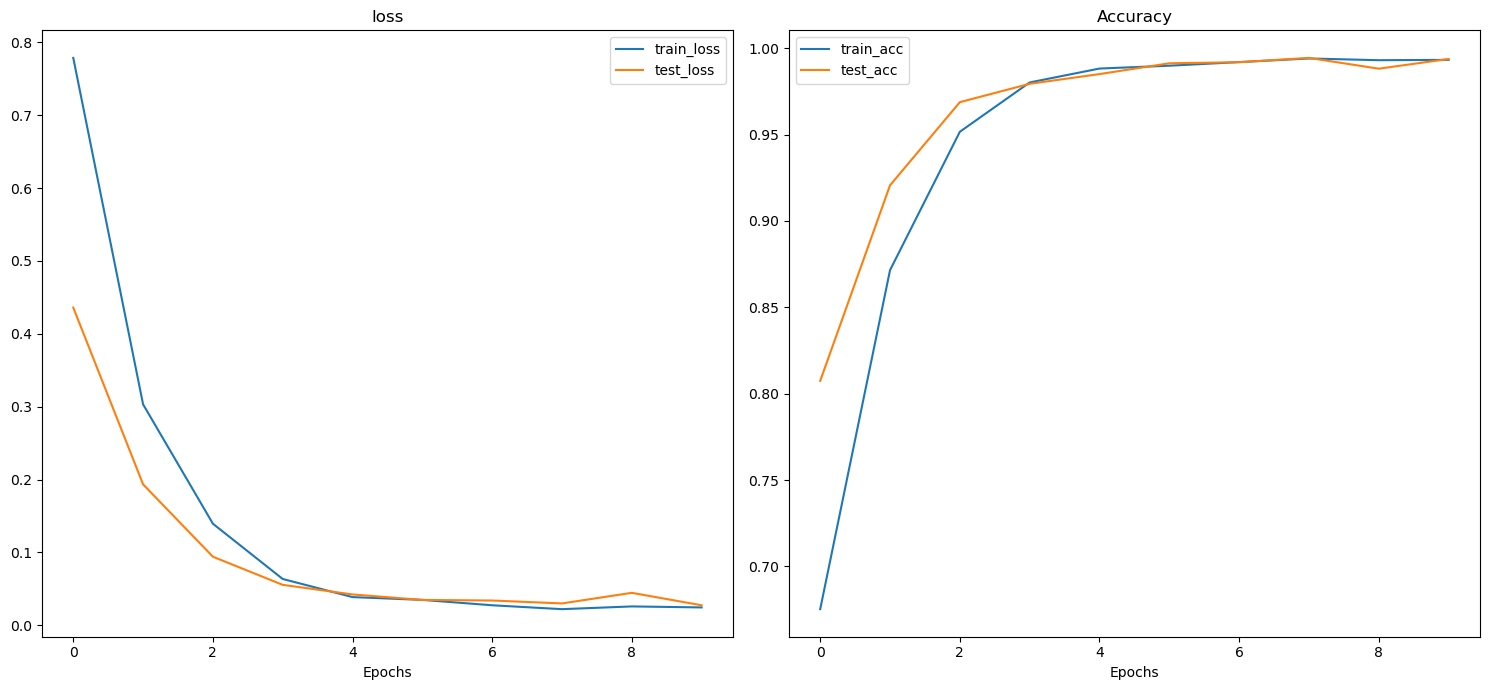

In [5]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

#Hyperparameter
NUM_EPOCHS = 10
# NUM_WORKERS = os.cpu_count()
LR_RATE = 1e-3


# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")

# Implement model
model_0 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=LR_RATE,
                            #  weight_decay=1e-5
                            )

start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_1,
                        test_dataloader=test_dataloader_1,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        # early_stopping=early_stopping
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

plot_loss_curves(model_0_results)

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.7909 | train_acc: 61.75% | test_loss : 0.5068| test_acc: 74.30%
Epochs: 1 | train_loss : 0.4817 | train_acc: 78.21% | test_loss : 0.4171| test_acc: 79.37%
Epochs: 2 | train_loss : 0.3329 | train_acc: 86.61% | test_loss : 0.2421| test_acc: 91.00%
Epochs: 3 | train_loss : 0.3524 | train_acc: 83.48% | test_loss : 0.2700| test_acc: 91.81%
Epochs: 4 | train_loss : 0.2733 | train_acc: 88.44% | test_loss : 0.5385| test_acc: 52.85%
Epochs: 5 | train_loss : 0.2655 | train_acc: 89.25% | test_loss : 0.1763| test_acc: 92.34%
Epochs: 6 | train_loss : 0.3276 | train_acc: 86.72% | test_loss : 0.3175| test_acc: 88.53%
Epochs: 7 | train_loss : 0.3042 | train_acc: 87.97% | test_loss : 0.2659| test_acc: 95.94%
Epochs: 8 | train_loss : 0.2549 | train_acc: 89.88% | test_loss : 0.2264| test_acc: 96.12%
Epochs: 9 | train_loss : 0.3123 | train_acc: 87.61% | test_loss : 0.2591| test_acc: 89.96%
Total training time: 584.517 seconds


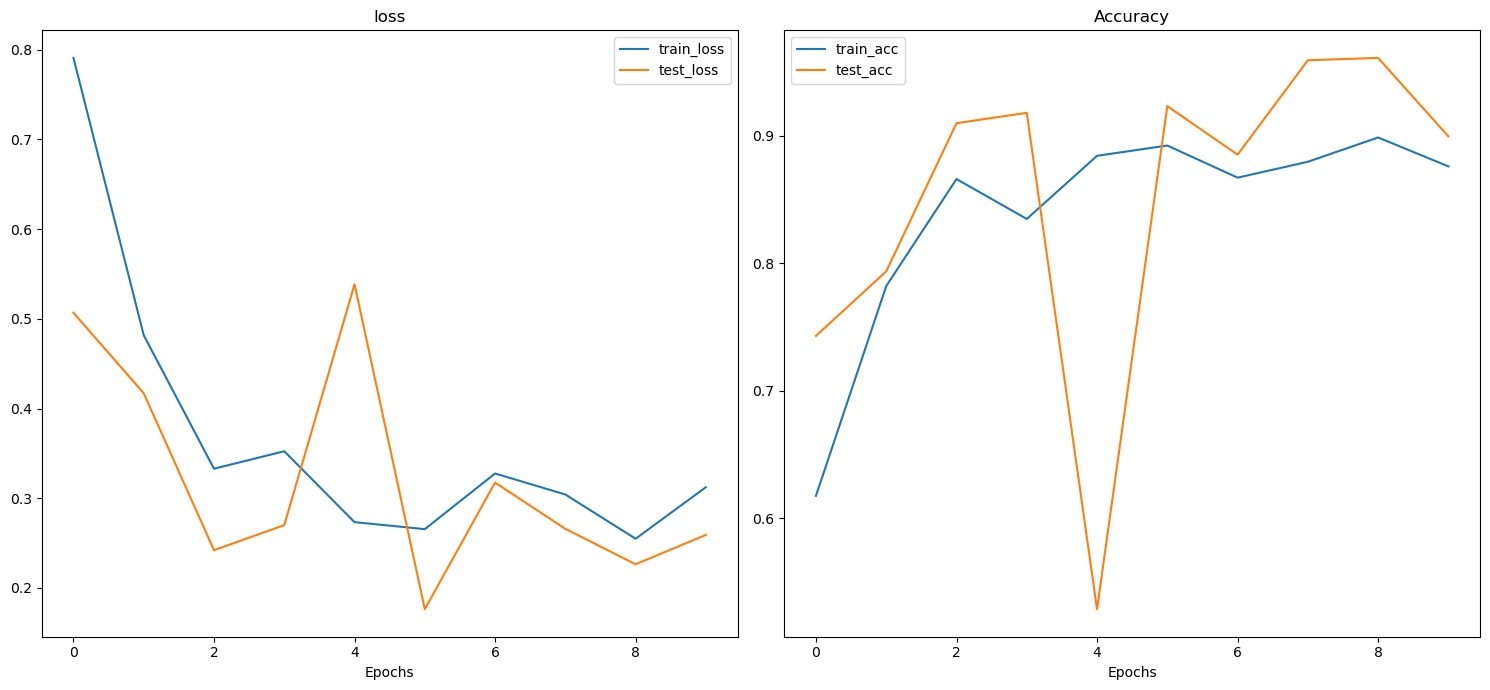

In [6]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

#Hyperparameter
NUM_EPOCHS = 10
# NUM_WORKERS = os.cpu_count()
LR_RATE = 1e-3


# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")

# Implement model
model_1 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=LR_RATE,
                            #  weight_decay=1e-5
                             )

start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_2,
                        test_dataloader=test_dataloader_2,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        # early_stopping=early_stopping
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

plot_loss_curves(model_1_results)

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.5335 | train_acc: 79.61% | test_loss : 0.1051| test_acc: 95.94%
Epochs: 1 | train_loss : 0.0944 | train_acc: 96.78% | test_loss : 0.0672| test_acc: 97.56%
Epochs: 2 | train_loss : 0.0776 | train_acc: 97.23% | test_loss : 0.0504| test_acc: 98.19%
Epochs: 3 | train_loss : 0.0543 | train_acc: 98.16% | test_loss : 0.0377| test_acc: 99.00%
Epochs: 4 | train_loss : 0.0353 | train_acc: 98.89% | test_loss : 0.0221| test_acc: 99.19%
Epochs: 5 | train_loss : 0.0345 | train_acc: 98.97% | test_loss : 0.0254| test_acc: 99.38%
Epochs: 6 | train_loss : 0.0198 | train_acc: 99.47% | test_loss : 0.0134| test_acc: 99.56%
Epochs: 7 | train_loss : 0.0168 | train_acc: 99.55% | test_loss : 0.0212| test_acc: 99.44%
Epochs: 8 | train_loss : 0.0144 | train_acc: 99.57% | test_loss : 0.0112| test_acc: 99.56%
Epochs: 9 | train_loss : 0.0127 | train_acc: 99.68% | test_loss : 0.0096| test_acc: 99.81%
Total training time: 668.016 seconds


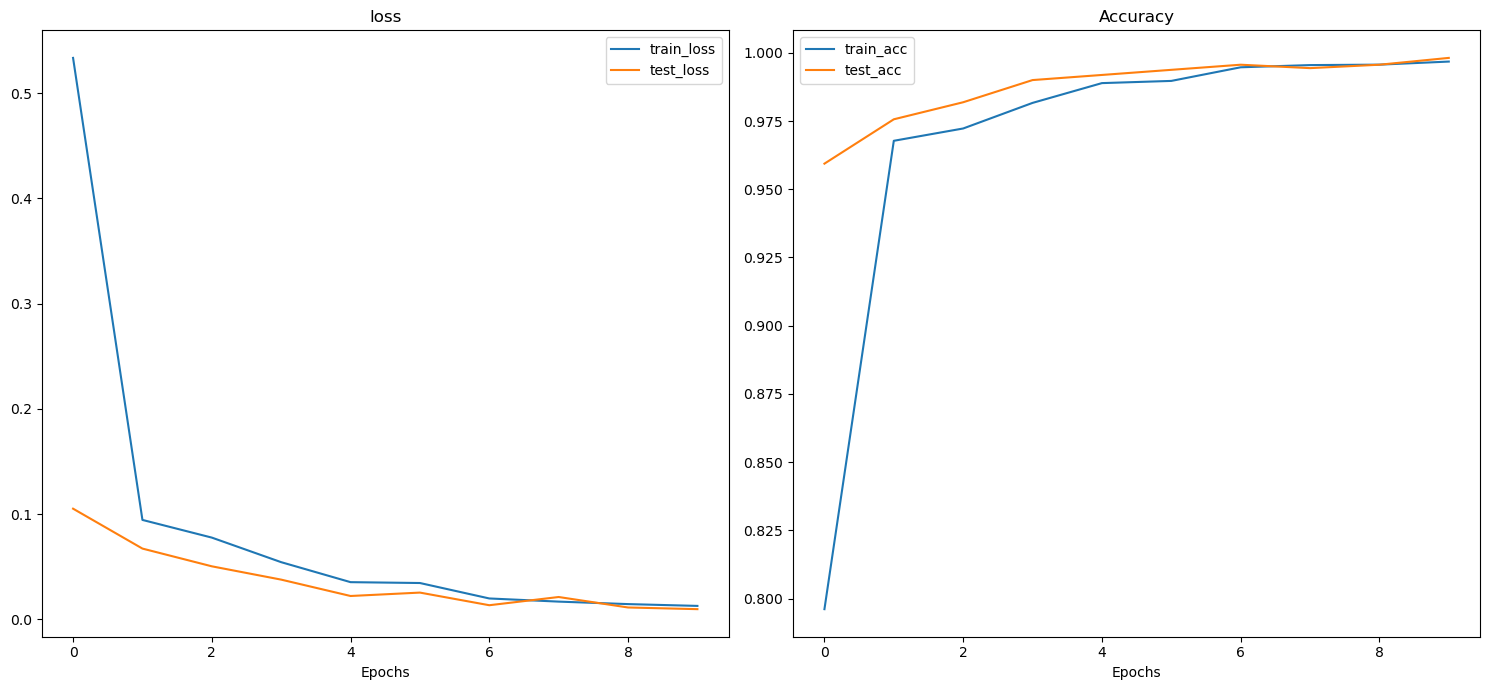

In [7]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

#Hyperparameter
NUM_EPOCHS = 10
# NUM_WORKERS = os.cpu_count()
LR_RATE = 1e-3


# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")

# Implement model
model_2 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=LR_RATE,
                            #  weight_decay=1e-5
                             )

start_time = timer()

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_3,
                        test_dataloader=test_dataloader_3,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        # early_stopping=early_stopping
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

plot_loss_curves(model_2_results)

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.3062 | train_acc: 92.57% | test_loss : 0.0831| test_acc: 97.88%
Epochs: 1 | train_loss : 0.0583 | train_acc: 98.37% | test_loss : 0.0720| test_acc: 97.94%
Epochs: 2 | train_loss : 0.0458 | train_acc: 98.65% | test_loss : 0.0461| test_acc: 98.75%
Epochs: 3 | train_loss : 0.0346 | train_acc: 98.93% | test_loss : 0.0325| test_acc: 99.19%
Epochs: 4 | train_loss : 0.0238 | train_acc: 99.42% | test_loss : 0.0383| test_acc: 99.00%
Epochs: 5 | train_loss : 0.0243 | train_acc: 99.36% | test_loss : 0.0247| test_acc: 99.50%
Epochs: 6 | train_loss : 0.0181 | train_acc: 99.57% | test_loss : 0.0287| test_acc: 99.31%
Epochs: 7 | train_loss : 0.0173 | train_acc: 99.61% | test_loss : 0.0242| test_acc: 99.44%
Epochs: 8 | train_loss : 0.0148 | train_acc: 99.66% | test_loss : 0.0212| test_acc: 99.50%
Epochs: 9 | train_loss : 0.0139 | train_acc: 99.63% | test_loss : 0.0220| test_acc: 99.44%
Total training time: 650.252 seconds


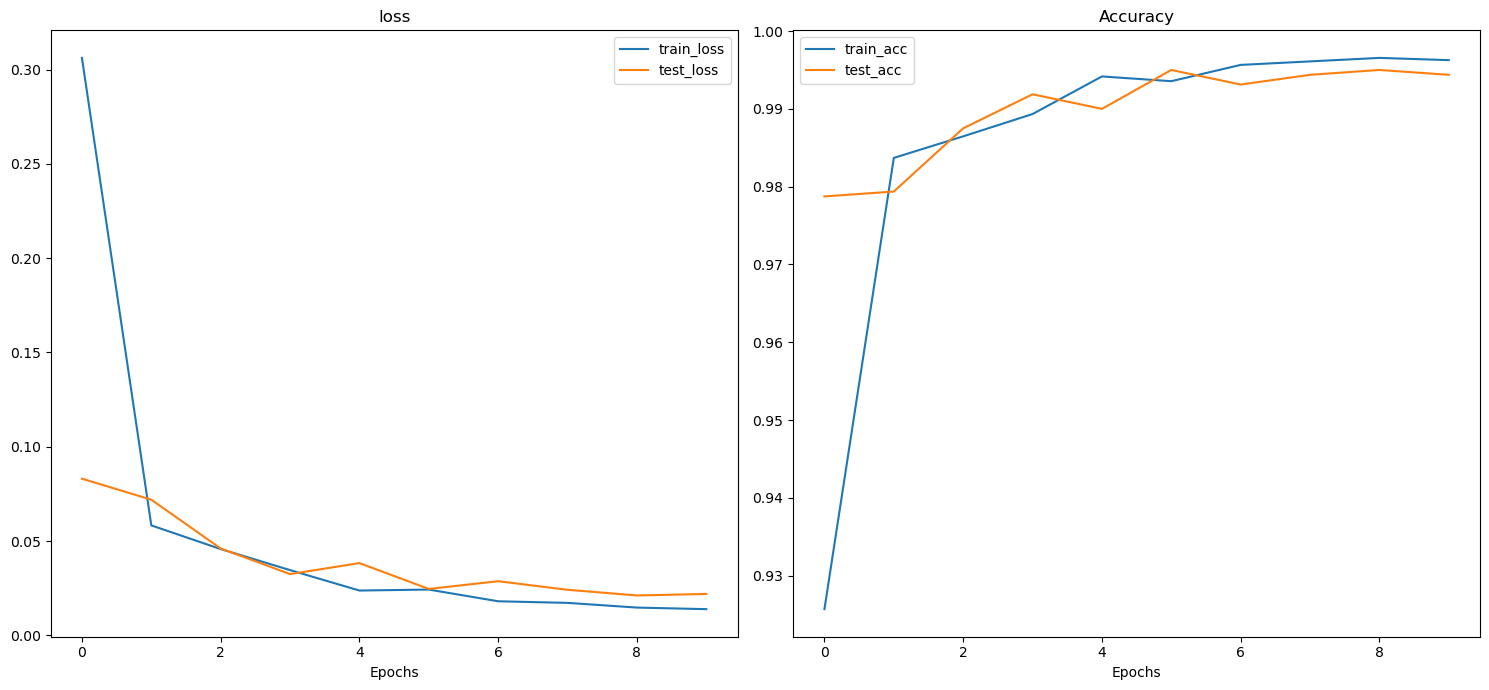

In [8]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

#Hyperparameter
NUM_EPOCHS = 10
# NUM_WORKERS = os.cpu_count()
LR_RATE = 1e-3


# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")

# Implement model
model_3 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(),
                             lr=LR_RATE,
                            #  weight_decay=1e-5
                             )

start_time = timer()

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader_4,
                        test_dataloader=test_dataloader_4,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        # early_stopping=early_stopping
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

plot_loss_curves(model_3_results)

In [9]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_2_df = pd.DataFrame(model_2_results)
model_3_df = pd.DataFrame(model_3_results)

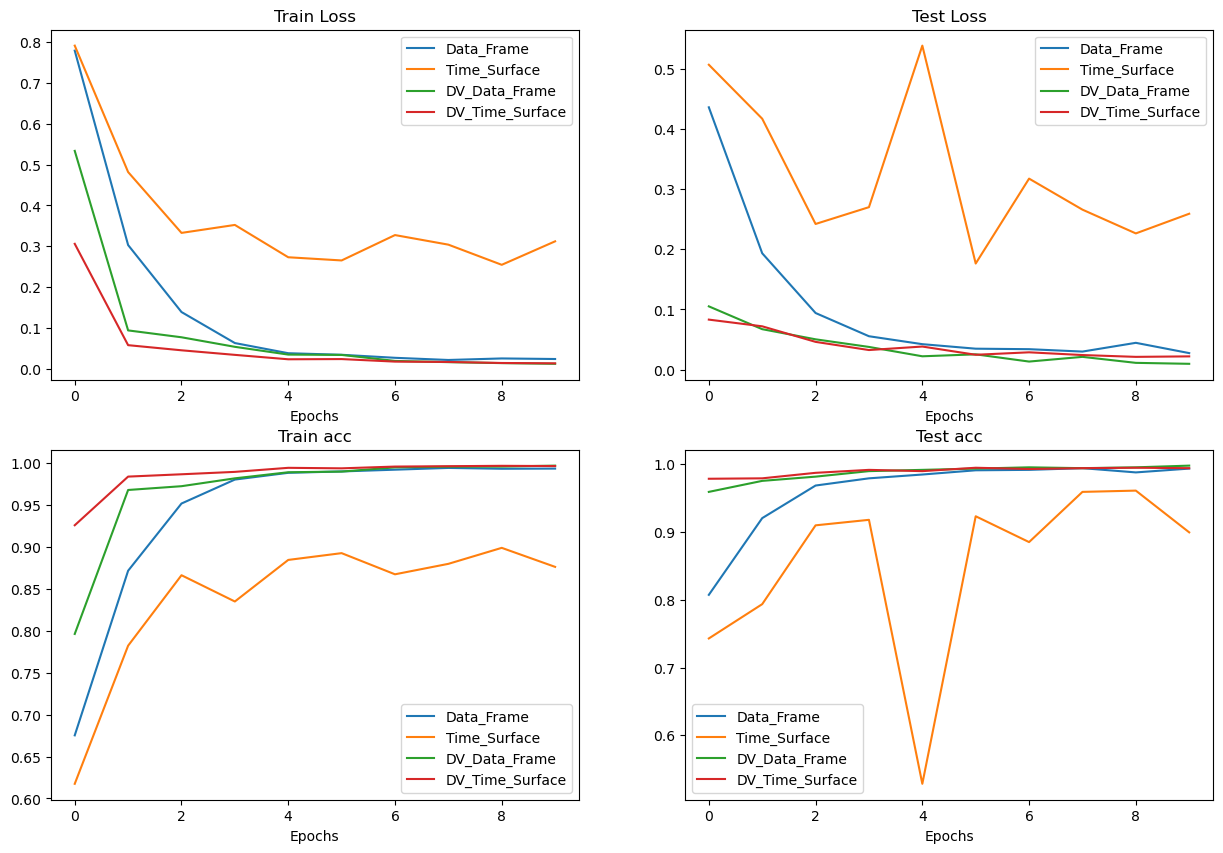

In [10]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Data_Frame")
plt.plot(epochs, model_1_df["train_loss"], label="Time_Surface")
plt.plot(epochs, model_2_df["train_loss"], label="DV_Data_Frame")
plt.plot(epochs, model_3_df["train_loss"], label="DV_Time_Surface")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Data_Frame")
plt.plot(epochs, model_1_df["test_loss"], label="Time_Surface")
plt.plot(epochs, model_2_df["test_loss"], label="DV_Data_Frame")
plt.plot(epochs, model_3_df["test_loss"], label="DV_Time_Surface")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Data_Frame")
plt.plot(epochs, model_1_df["train_acc"], label="Time_Surface")
plt.plot(epochs, model_2_df["train_acc"], label="DV_Data_Frame")
plt.plot(epochs, model_3_df["train_acc"], label="DV_Time_Surface")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Data_Frame")
plt.plot(epochs, model_1_df["test_acc"], label="Time_Surface")
plt.plot(epochs, model_2_df["test_acc"], label="DV_Data_Frame")
plt.plot(epochs, model_3_df["test_acc"], label="DV_Time_Surface")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend()